<a href="https://colab.research.google.com/github/sjhd1109/study/blob/main/Colaboratory%EC%97%90_%EC%98%A4%EC%8B%A0_%EA%B2%83%EC%9D%84_%ED%99%98%EC%98%81%ED%95%A9%EB%8B%88%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Computations
import pandas as pd
import numpy as np

## Text

from IPython.display import Image, display, Markdown, Latex

## seaborn
import seaborn as sns
sns.set_context('paper', rc={'font.size':12,'axes.titlesize':14,'axes.labelsize':12})
sns.set_style('white')

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model
import keras.backend as K

# Visualisation libraries

## Text
from IPython.display import Image, display, Markdown, Latex

## seaborn
import seaborn as sns
sns.set_context('paper', rc={'font.size':12,'axes.titlesize':14,'axes.labelsize':12})
sns.set_style('white')

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
import matplotlib.gridspec as gridspec
import matplotlib.colors
from pylab import rcParams
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = 14, 8
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

## plotly
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
from plotly import tools
import plotly.express as px
import plotly.figure_factory as ff
# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

import warnings
warnings.filterwarnings('ignore')

In [48]:
from google.colab import drive 
drive.mount('/content/drive') # 새로운 창에서 key 를 받아서 입력해야합니다. 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
filename = '/content/drive/MyDrive/대학원 자료/GermanCredit.csv'

In [50]:
#pandas read_csv로 불러오기
CreditRiskData = pd.read_csv(filename, index_col=0)
CreditRiskData.head()
print('Shape before deleting duplicate values:', CreditRiskData.shape)

# Removing duplicate rows if any
CreditRiskData=CreditRiskData.drop_duplicates()
print('Shape After deleting duplicate values:', CreditRiskData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
CreditRiskData.head(10)

Shape before deleting duplicate values: (1000, 21)
Shape After deleting duplicate values: (1000, 21)


,goodbad,checking,duration,history,purpose,amount,savings,employed,installp,martial,coapp,resident,property,age,other,housing,existcr,job,depends,telephon,foreign
0,1,2,9,5,3,1919,1,4,4,3,1,3,3,35,3,1,1,3,1,2,1
1,2,1,18,3,1,1216,1,2,4,2,1,3,3,23,3,1,1,3,1,2,1
2,1,4,6,5,4,1382,1,3,1,2,1,1,3,28,3,2,2,3,1,2,1
3,1,4,12,3,1,1101,1,3,3,4,1,2,1,27,3,2,2,3,1,2,1
4,1,1,18,3,1,2249,2,4,4,3,1,3,3,30,3,2,1,4,2,2,1
5,1,4,36,5,2,10477,5,5,2,3,1,4,4,42,3,3,2,3,1,1,1
6,1,2,18,3,4,1113,1,3,4,2,3,4,1,26,3,2,1,2,2,1,1
7,2,1,40,5,7,5998,1,3,4,3,1,3,4,27,1,2,1,3,1,2,1
8,1,4,12,3,1,2133,5,5,4,2,1,4,4,52,3,3,1,4,1,2,1
9,1,2,26,3,2,7966,1,2,2,3,1,3,3,30,3,2,2,3,1,1,1


- Target Variable: goodbad
- Predictors: checking	duration	history	purpose	amount	savings	employed	installp	martial	coapp	resident	property	age	other	housing	existcr	job	depends	telephon	foreign

- GoodCredit=1 means the loan was a bad decision.
- GoodCredit=2 means the loan was a good decision.

In [51]:
CreditRiskData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   goodbad   1000 non-null   int64
 1   checking  1000 non-null   int64
 2   duration  1000 non-null   int64
 3   history   1000 non-null   int64
 4   purpose   1000 non-null   int64
 5   amount    1000 non-null   int64
 6   savings   1000 non-null   int64
 7   employed  1000 non-null   int64
 8   installp  1000 non-null   int64
 9   martial   1000 non-null   int64
 10  coapp     1000 non-null   int64
 11  resident  1000 non-null   int64
 12  property  1000 non-null   int64
 13  age       1000 non-null   int64
 14  other     1000 non-null   int64
 15  housing   1000 non-null   int64
 16  existcr   1000 non-null   int64
 17  job       1000 non-null   int64
 18  depends   1000 non-null   int64
 19  telephon  1000 non-null   int64
 20  foreign   1000 non-null   int64
dtypes: int64(21)
memory usage: 171.9 KB


In [55]:
df = CreditRiskData.copy()
df['goodbad'] = df['goodbad'].astype('category')
df['checking'] = df['checking'].astype('category')
df['history'] = df['history'].astype('category')   
df['purpose'] = df['purpose'].astype('category')   
df['savings'] = df['savings'].astype('category')   
df['employed'] = df['employed'].astype('category')   
df['martial'] = df['martial'].astype('category')   
df['coapp'] = df['coapp'].astype('category')   
df['property'] = df['property'].astype('category')   
df['other'] = df['other'].astype('category')   
df['housing'] = df['housing'].astype('category')   
df['job'] = df['job'].astype('category')   
df['telephon'] = df['telephon'].astype('category')   
df['foreign'] = df['foreign'].astype('category')   

In [125]:
Target = 'goodbad'
predictors=['duration', 'amount', 'installp', 'resident','age','existcr', 'depends']

X1=df[predictors].values
y1=df[Target].values

X = df.drop(columns = [Target])
y = df[Target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=1)

pd.DataFrame(data={'Set':['X_train','X_val', 'X_test','Y_train','Y_val','Y_test'],
               'Shape':[X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape]}).set_index('Set').T

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.2, stratify=y1_train, random_state=1)

pd.DataFrame(data={'Set':['X_train','X_val', 'X_test','Y_train','Y_val','Y_test'],
               'Shape':[X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape]}).set_index('Set').T


Index(['checking', 'duration', 'history', 'purpose', 'amount', 'savings',
       'employed', 'installp', 'martial', 'coapp', 'resident', 'property',
       'age', 'other', 'housing', 'existcr', 'job', 'depends', 'telephon',
       'foreign'],
      dtype='object')


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           1       0.75      0.86      0.80       140
           2       0.50      0.33      0.40        60

    accuracy                           0.70       200
   macro avg       0.62      0.60      0.60       200
weighted avg       0.68      0.70      0.68       200

[[120  20]
 [ 40  20]]
Accuracy of the model on Testing Sample Data: 0.68


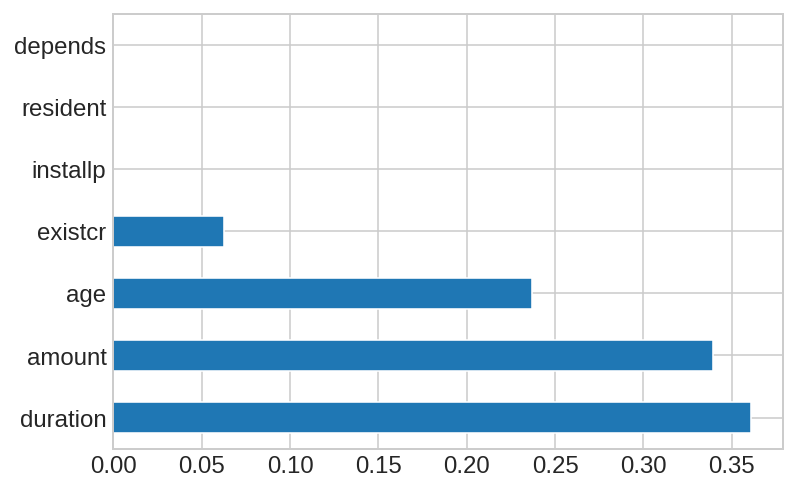

In [141]:
#decision tree
# Choose various values of max_depth and criterion for tuning the model
model = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')

# Printing all the parameters of Decision Trees
print(model)

# Creating the model on Training Data
DTree=model.fit(X_train,y_train)
prediction=DTree.predict(X_test)

DTree1=model.fit(X1_train,y1_train)
prediction1=DTree.predict(X1_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=predictors)
feature_importances.nlargest(10).plot(kind='barh')


In [138]:
import pydotplus

from sklearn.tree import export_graphviz

from IPython.core.display import Image

# out_file=None : 결과를 파일로 저장하지 않겠다.
# filled=True : 상자 채우기
# rounded=True : 상자모서리 둥그렇게 만들기
# special_characters=True : 상자안에 내용 넣기

dot_data = export_graphviz(model)

dot_data = export_graphviz(model, out_file="C:\data",

                           feature_names= predictors,

                           class_names=["Good","Bad"],

                           filled=True, rounded=True,

                           special_characters=True)

 

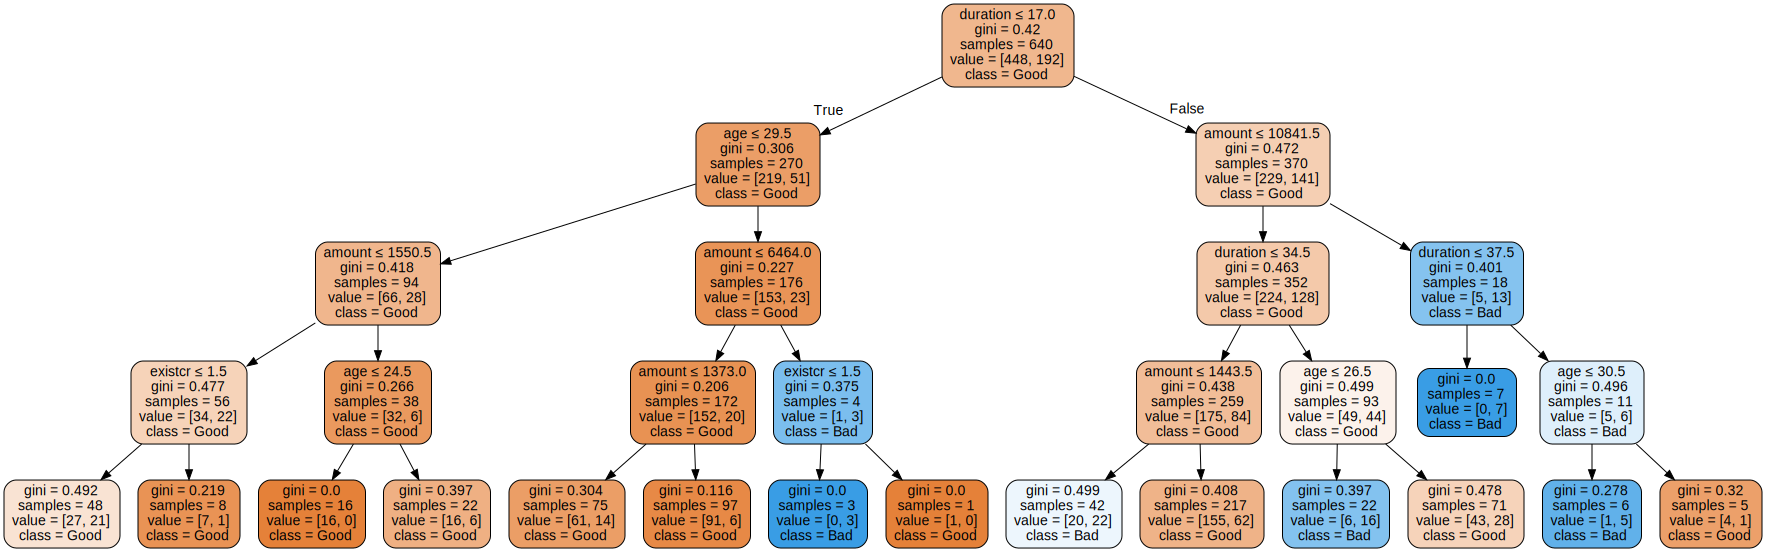

In [139]:
from IPython.display import display
import graphviz
with open("C:\data") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))